# Praca domowa 5

In [1]:
import pandas as pd
import numpy as np
Users = pd.read_csv("Users.csv.gz")
Posts = pd.read_csv("Posts.csv.gz")
Comments = pd.read_csv("Comments.csv.gz")

### Zadanie 1

<AxesSubplot:>

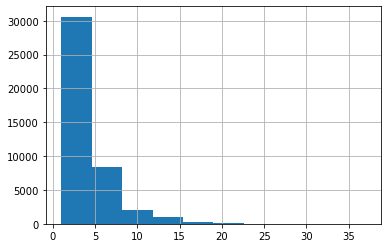

In [14]:
Comments.groupby("PostId")\
    .size()\
    .hist()

### Zadanie 2

In [15]:
OwnerUserId_max = Posts.groupby("OwnerUserId")\
                    .sum("ViewCount")\
                    .reset_index()[["OwnerUserId","ViewCount"]]\
                    .rename(columns={"ViewCount": 'ViewCount_sum'})\
                    .sort_values(by='ViewCount_sum', ascending=False).values[0,0]
Users[Users["Id"] == OwnerUserId_max].values[0,3]

'Mark Mayo'

### Zadanie 3

In [16]:
aaid = Posts[pd.isnull(Posts["AcceptedAnswerId"]) == False]["AcceptedAnswerId"]   # wybieram posty, ktore mają zaakceptowaną odpowiedź
second_userid = Posts[Posts["Id"].isin(aaid)].groupby("OwnerUserId")\
                            .size()\
                            .reset_index(name="n")\
                            .sort_values("n", ascending = False).values[1,0]   # ze wszystkich postów wybieram te, które są zaakceptowanymi odpowiedziami, następnie grupuję je ze względu na użytkowników i wybieram Id tego, który ma drugą największa liczbę 
Users[Users["Id"] == second_userid].values[0,3]  # zapisane Id odnajduję w ramce Users, aby uzyskać nazwę użytkownika

'jpatokal'

### Zadanie 4

In [17]:
posts_selected = Posts[["AcceptedAnswerId","Id","ParentId","Score"]]
score_max = posts_selected.groupby("ParentId")\
        .max("Score")\
        .reset_index()[["ParentId","Score"]] # odpowiedź o najwyższym wyniku dla każdego posta

aaid2 = posts_selected[pd.isnull(Posts["AcceptedAnswerId"]) == False]["AcceptedAnswerId"] # wybieram posty, ktore mają zaakceptowaną odpowiedź

zaakceptowane = posts_selected[posts_selected["Id"].isin(aaid2)][["AcceptedAnswerId","Id","Score","ParentId"]]  # ze wszystkich postów wybieram te, które są zaakceptowanymi odpowiedziami

df_merged = zaakceptowane.merge(score_max, on = "ParentId")\
    .rename(columns = {"Score_x":"score_acc","Score_y":"max_score"})  # łączę dwie ramki, aby porównać wyniki odpowiedzi (tzn. wynik odpowiedzi o najwyższym wyniku z ramki score_max oraz wynik odpowiedzi, która jest zaakceptowaną odpowiedzią)

nizszy = df_merged[df_merged["score_acc"] < df_merged["max_score"]]  # wybieram posty, dla których wynik zaakceptowanej odpowiedzi jest niższy niż wynik odpowiedzi o najwyższym wyniku

ods = nizszy.shape[0]/Posts.shape[0]*100   # liczę odsetek postów, dla których wynik zaakceptowanej odpowiedzi jest niższy niż wynik odpowiedzi o najwyższym wyniku we wszystkich postach


print("Około " + str(round(ods,2)) + "%")

Około 1.44%
